In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./alugueis.csv')

# Funções

In [3]:
df['data_postagem'] = df['data_postagem'].apply(pd.to_datetime)
df['metro_quadrado'] = df['metro_quadrado'].apply(pd.to_numeric)
df['bairro'] = df['bairro'].apply(lambda x: x.strip())

In [4]:
df['preco_aluguel'] = df['preco_aluguel'].apply(lambda x: str(x))
df['preco_aluguel'] = df['preco_aluguel'].apply(lambda x: x.replace('.',''))
df.fillna(0)
df['preco_aluguel'] = pd.to_numeric(df['preco_aluguel'], errors='coerce')

In [5]:
df = df[df.data_postagem.notnull()]

In [6]:
dic = {
    "Centro":['Bela Vista','Bixiga','Morro Dos Ingleses','Paraíso','BOM RETIRO','Bom Retiro','Luz','Ponte Grande','Ponte Pequena','BRÁS','Brás','Roosevelt (Cbtu)','CAMBUCI','Cambuci','Vila Deodoro','Morro da Pólvora','Várzea do Glicério','CONSOLAÇÃO','Vila Buarque','Cerqueira Cesar','Consolação','Higienópolis','Pacaembu','LIBERDADE','Aclimação','Morro da Aclimação','Bairro do Glicério','Liberdade','Paraíso','Várzea do Glicério','PARI','Canindé','Pari','REPÚBLICA','Anhangabaú','Vila Buarque','República','Santa Efigênia','SANTA CECÍLIA','Barra Funda','Campos Elíseos','Luz','Santa Cecília','Várzea da Barra Funda','SÉ','Anhangabaú','Parque Dom Pedro ','Mercado','Sé'],
    "Leste":['Anália Franco','Aricanduva','Carrão','Vila Formosa','Cidade Tiradentes','Ermelino Matarazzo','Ponte Rasa','Guaianases','Lajeado','Itaim Paulista','Vila Curuçá','Itaquera','Cidade Líder','José Bonifácio','Parque do Carmo','Mooca Água Rasa','Belém','Brás','Mooca','Pari','Tatuapé','Penha','Artur Alvim','Cangaíba','Penha','Vila Matilde','São Mateus','São Rafael','São Miguel','Jardim Helena','Vila Jacuí','Sapopemba','Vila Prudente','São Lucas'],
    "Norte":['Jardim Aliança','Jardim Cabuçu','Vila Carolina','Vila Constância','Parque Edu Chaves','Vila Ester','Vila Germinal','Guapira','Vila Isabel','Jaçanã','Jardim Jaçanã','Conjunto Habitacional Jova Rural','Vila Laura','Vila Milagrosa','Jardim Modelo','Conjunto Residencial Montepio','Vila Nelson','Vila Nilo','Vila Nova Galvao','Vila Santa Terezinha','Chácara São Joao','MANDAQUI','Vila Amélia','Vila Aurora','Vila Basileia','Cantareira','Jardim Carlu','Vila Celeste','Jardim Emília','Chácara do Encosto','Jardim Flamingo','Vila Guaça','Horto Florestal','Imirim','Jardim Itatinga','Lauzane Paulista','Jardim Malba','Mandaqui','Parque Mandaqui','Jardim Maninos','Jardim Ormendina','Jardim Paraíso','Pedra Branca','Sitio Pedra Branca','Vila Pedra Branca','Jardim Picolo','Vila Romero','Jardim Santa Inês','Conjunto Residencial Santa Terezinha','Conjunto Residencial Santo Antonio','Vila Santo Antonio','Vila Santos','Jardim Sônia','Jardim Vieira de Carvalho','Vila Vitorio Mazzei','SANTANA','Água Fria','Parque Anhembi','Vila Benevente','Vila Bianca','Jardim Carmem Verônica','Chora Menino','Jardim do Colégio','Jardim Guanandi','Imirim','Vila Jose Casa Grande','Mandaqui','Vila Mariza Mazzei','Vila Matias','Vila Pauliceia','Vila Rabelo','Jardim Santa Luzia','Santa Terezinha','Santana','Vila Santana','Jardim São Paulo','Vila Siciliano','Vila Vitoria','Vila Zélia','TREMEMBÉ','Vila Albertina','Jardim Ataliba Leonel','Vila Aurora','Barrocada','Jardim Bibi','Bortolândia','Vila Brasil','Campo Limpo','Cantareira','Parque Casa da Pedra','Jardim Cristina','Jardim Daysi','Jardim Denise','Vila Dornas','Jardim Entre Serras','Vila Esmeralda','Conjunto Fidalgo','Vila Fidalgo','Jardim Floresta','Jardim da Fonte','Vila Francisco Mentem','Furnas','Guapira','Jardim Guapira','Jardim Iara','Jardim Ibira','Jardim Ibiratiba','Vila Irmãos Arnoni','Jardim Jaçanã','Jardim Joamar','Jardim Joana D','arc','Jardim Lugo','Jardim Luiza','Jardim Maria Antônia','Vila Maria Augusta','Jardim Maria Cândida','Jardim Maria Nazaré','Vila Marieta','Jardim Mario Fonseca','Jardim Martins Silva','Jardim Miguel Mauricio','Vila Nova Mazzei','Parque Palmas do Tremembé','Vila Paulistana','Jardim Das Pedras','Vila Pereira','Parque Petrópolis','Jardim Piqueri','Sitio do Piqueri','Jardim Quarto Centenário','Parque Ramos De Freitas','Jardim Das Rosas','Vila Dos Rosas','Santa Cruz Do Corisco','Jardim Santa Marcelina','Jardim Santa Maria','Jardim São Luis','Jardim São Manoel','Vila Solear','Tremembé','Parque Residencial Tremembé','Vila Vieira','Jardim Virginia Bianca','Vila Virginia','Vila Zilda','TUCURUVI','Barro Branco','Jardim Barro Branco','Vila Cachoeira','Vila Constança','Vila Dom Pedro 2','Jardim Dona Leonor Mendes de Barros','Jardim Floresta','Jardim Franca','Vila Germinal','Vila Gustavo','Jardim Kherlakian','Vila Mazzei','Jardim Nelson','Vila Nivi','Parada Inglesa','Vila Pedrosa','Parque Rodrigues Alves','Vila Santa Terezinha','Tucuruvi','Jardim Vieira de Carvalho','Parque Vitoria','Tucuruvi','VILA GUILHERME','Vila Bariri','Carandiru','Coroa','Jardim Coroa','Chácara Cuoco','Jardim da Divisa','Vila Eleonore','Vila Guilherme','Vila Isolina Mazzei','Vila Isolina','Vila Leonor','Vila Paiva','Vila Pizzotti','Vila Salvador Romeu','Vila Santa Catarina','Jardim Sara','Vila Vessoni','VILA MARIA','Jardim AndaraÍ','Jardim JapÃo','Vila Maria Alta','Vila Maria Baixa','Conjunto Promorar Vila Maria','Parque Vila Maria','Vila Maria','Parque Novo Mundo','VILA MEDEIROS','Vila Alegria','Jardim Brasil','Vila Ede','Vila Eleonore','Vila Elisa','Conjunto Promorar Fernão Dias','Jardim Guançã','Jardim Julieta','Vila Medeiros','Vila Munhoz','Jardim Néila','Parque Novo Mundo','Conjunto Habitacional Jardim Paulistano','Vila Sabrina','Anhangüera','Jardim Anhanguera','Parque Anhanguera','Jardim Britânia','Vila Chica Luiza','ardim Clei','arque Morro Doce','ardim Escócia','ila Jaraguá','hácara Maria Trindade','orado do Sol','ila Sulina','BRASILÂNDIA','Jardim Almanara','Jardim Alvorada','ardim Ana Maria','ila Áurea','arque Belém','rasilândia','ardim Brasília','ardim Carumbé','ardim dos Cunha','ardim Damasceno','ila Dulcina','Vila Elias Nigri','Jardim Elisa Maria','Jardim Elísio','onjunto Promorar Estrada da Parada','ohab Sítio dos Francos','ardim dos Francos','ardim Guarani','ardim dos Guedes','arque Hollywood','ila Icaraí','ardim Irene','ila Isabel','ardim Ismênia','ila Itaberaba','ardim Ladeira Rosa','ardim Magali','ardim Maracanã','ardim Maristela','ila Nina','ardim Ondina','ardim Paulistano','arque Pedroso','Vila Penteado','Jardim Princesa','Vila Real','Jardim Recanto','Vila Rica','Vila São Joao Batista','Vila São Joaquim','Vila Serralheiro','Vila Souza','Vila Terezinha','Parque Tiete','Jardim do Tiro','Vila Vista Alegre','Vila Zulmira Maria','CACHOEIRINHA','Vila Amália','Vila Amélia','Vila dos Andrades','Vila Angélica','Cj Hab Jardim Antártica','Vila Bela Vista','Vila Cachoeirinha','Campo da Água Branca','Sitio Casa Verde','Jardim Ceci','Vila Celeste','Jardim Centenário','Vila Continental','Vila Dionísia','Jardim Flamingo','Jardim Imirim','Jardim Nossa Senhora da Consolata','Cohab Vila Nova Cachoeirinha','Vila Nova Cachoeirinha','Vila Paulo Raveli','Jardim Peri Alto','Jardim Peri Novo','Jardim Peri','Vila Pita','Vila Roque','Jardim Santa Cruz','Vila Vista Alegre','CASA VERDE','Vila Bandeirantes','Vila Baruel','Vila Bianca','Casa Verde','Casa Verde Alta','Casa Verde Baixa','Casa Verde Media','Vila Célia','Vila Ester','Vila Gouveia','Jardim Ibéria','Imirim','Jardim das Laranjeiras','Parque Leo','Sítio do Mandaqui','Vila Minosi','Parque Peruche','Vila Rossin','Jardim São Bento','Jardim São Domingos','Jardim São Miguel','Parque Souza Aranha','Vila Vanda','FREGUESIA DO Ó','Vila Acre','Jardim Adélia','Vila Albertina','Vila Amélia','Vila Arcádia','Vila Áurea','Vila Bancária Munhoz','Vila Bela','Vila Bela','Vila Bracaia','Vila Brito','Vila Bruna','Jardim Cachoeira','Cachoeirinha','Vila Cardoso','Vila Cavaton','Vila do Congo','Vila Cruz das Almas','Chácara Domilice','Vila Dona América','Vila Elias Nigri','Vila Elisabete','Vila Ferrucio','Freguesia do Ó','Vila Gonçalves','Vila Hebe','Vila Hermínia','Vila Iara','Vila Iara','Vila Iório','Jardim Iracema','Vila Ismênia','Itaberaba','Parque Itaberaba','Vila Julio Cesar','Vila Liderlândia','Parque Mandi','Vila Manoel Lopes','Vila Marilu','Vila Marina','Jardim Maristela','Vila Miriam','Moinho Velho','Jardim Monjolo','Jardim Monte Alegre','Parque Monteiro Soares','Morro Grande','Vila Morro Verde','Vila Nívea','Jardim Noêmia','Chácara Nossa Senhora Aparecida','Nossa Senhora do Ó','Vila Olga','Vila Palmeira','Vila Piccinin','Vila Portuguesa','Cj Hab Prestes Maia','Vila Primavera','Vila Progresso','Vila Progresso','Vila Ramos','Vila Regina','Chácara do Rosario','Vila Sá E Silva','Vila Santa Delfina','Vila São Francisco','Vila São Joao Batista','Vila São Joaquim','Vila São Jorge','Parque São Luis','Jardim São Marcos','Vila São Vicente','Vila Schimidt','Vila Serralheiro','Vila Simões','Vila Siqueira','Vila Timóteo','Vila União','Vila Zulmira Maria','JARAGUÁ','Jardim Alvina','Vila Ana Rosa','Jardim Bandeirantes','Conjunto Habitacional Brigadeiro Eduardo Gomes','Vila Chica Luisa','Vila Clarice','Cidade D','abril','Parque Estadual do Jaraguá','Vila Ferrão','Vila Homero','Jardim Ipanema','Jaraguá','Estância Jaraguá','Vila Jardim Zoológico','Jardim Jose Maria','Jardim Líder','Jardim Marilu','Parque Nações Unidas','Vila Nossa Senhora da Conceição','Vila Nova Parada','Parque Panamericano','Parada De Taipas','Cohab Pirituba','Jardim Pirituba','Jardim Rincão','Jardim Santa Cruz','Vila Santa Lucrécia','Vila Santo Antonio','Vila Santo Estevam Reis','Jardim São João','Jardim Shangrila','Parque Jardim Taipas','Jardim Vivian','Cohab Voith','LIMÃO','Vila Acre','Vila Barbosa','Cachoeirinha','Vila Carbone','Vila Carolina','Casa Verde Alta','Vila Célia','Vila Cristo Rei','Vila Diva','Vila Espanhola','Jardim das Graças','Limão','Bairro do Limão','Jardim Marina','Vila Marisbela','Chácara Morro Alto','Vila Morro Alto','Jardim do Morro','Conjunto Residencial Novo Pacaembu','Jardim Pereira Leite','Vila Prado','Jardim Primavera','Vila Santa Maria','Vila Santista','Vila São Luis','Vila Siqueira','Jardim Tabor','PERUS','Jardim Adelfiore','Areião','Vila Caiuba','Cidade D','abril','Vila Fanton','Vila Flamengo','Vila Inácio','Sítio Joá','Vila Malvina','Jardim dos Manacás','Chácara Maria Trindade','Jardim Marilu','Perus','Vila Perus','Jardim do Russo','Vila São Paulo','Jardim Taipas','PIRITUBA','Jardim Anagilda','Recanto Anastácio','Vila Barreto','Vila Boacava','Vila Bonilha Nova','Vila Bonilha','Vila Cachoeira','Vila Catupia','Jardim Cidade Pirituba','City Recanto Anastácio','Vila Clarice','Vila Comercial','Jardim dos Cunha','Jardim Felicidade','Vila Florentina','Vila Genioli','Vila Hermínia Lopes','Vila Hermínia','Chácara Inglesa','Jardim Iris','Vila Itapeva','Jardim Jose Maria','Jardim Líbano','Vila Liderança','Jardim Maggi','Vila Maria Trindade','Jardim Maristela','Vila Mirante','Vila Miriam','Jardim Recanto Monte Alegre','Vila Moraes','Vila Nossa Senhora Aparecida','Vila Nossa Senhora Do Retiro','Vila Olga Cecília','Vila Palmeiras','Jardim Paquetá','Vila Pereira Barreto','Vila Pereira Cerca','Vila Piccinin','Jardim dos Pinheiros','Piqueri','Pirituba','Parque Pirituba','Vila Pirituba','Vila Portugal','Jardim Regina','Vila Regina','Vila Renato','Jardim Santa Mônica','Vila Santo Antonio','Vila São Jorge','Vila São Jose','Jardim São Jose'
             'Jardim São Ricardo','Jardim Sidney','Vila Taiau','Vila Ursulina','Jardim Vista Linda','Conjunto Residencial Vista Verde','Jardim Vitória','Vila Zat','SÃO DOMINGOS','Parque Anhanquera','Vila Boaçava','City América','Vila Fiat Lux','Vila Guedes','Vila Jaguari','Jardim Jaraguá','Jardim Mangalot','Vila Mangalot','Parque Maria Domtila','Vila Maria Eugênia','Jardim Maristela','Jardim Monte Alegre','Jardim Mutinga','Jardim Nardini','Jardim Santo Elias','Parque São Domingos','Jardim São Elias,Vila Soares','Jardim Vista Linda'],
    "Oeste": ['Vila Olímpia,','Jardins','Butantã','Morumbi','Raposo Tavares','Rio Pequeno','Vila Sônia','Lapa','Barra Funda','Jaguara','Jaguaré','Perdizes','Vila Leopoldina','Pinheiros','Alto de Pinheiros','Itaim Bibi','Jardim Paulista','Pinheiros','Alto de Pinheiros','Jardim Atibaia','Vila Beatriz','Sitio Boa Vista','Boaçava','Jardim Califórnia','Vila Ida','Jardim dos Jacarandas','Vila Jatai','Jardim Lígia','Vila Madalena','Vila Nogueira','Santa Boa Vista','Jardim Santa Lúcia','Parque Vila Lobos','BARRA FUNDA','Água Branca','Barra Funda','Vila Barra Funda','Vila Chalot','Vila dos Ferroviários','Parque Industrial Tomas Edson','BUTANTÃ','Jardim Ademar de Barros','Cidade Bandeirantes',
        'Cidade dos Bandeirantes','Jardim Bonfiglioli',
        'Conjunto Residencial Butantã','Caxingui','Jardim Caxingui','Jardim Centenário','Jardim Christie','Jardim Educandário','Jardim Esmeralda','Vila Gomes','Vila Indiana','Inocoop','Jardim Matarazzo','Jardim Peri-Peri',
        'Jardim Pinheiros','Vila Pirajussara','Jardim Instituto Previdência','Jardim Rizzo','Jardim Rolinópolis','Jardim São Gilberto','Cidade Universitária','ITAIM-BIBI','Jardim Das Acácias','Brooklin','Brooklin Novo','Brooklin Paulista','Vila Cordeiro','Jardim Edith','Vila Funchal','Vila Gertrudes','Ibirapuera','Itaim Bibi','Chácara Itaim','Cidade Monções','Vila Olímpia','JAGUARA','Parque Anhanguera','Vila Aparecida Ivone','Jardim Belaura','Jardim Cimobil','Vila Eleonora','Jaguara','Vila Jaguara','Jardim Marisa','Vila Nilva','Jardim Piauí','Vila Piauí','Vila Remédios',
        'Vila Santa Edwiges','Chácara São Joao','Vila Varanda','Jardim Vieira','JAGUARÉ','Conjunto Butantã','Parque Continental','Vila Graziella','Jaguaré','Centro Industrial Jaguaré','Vila Jaguaré','Vila Lageado','JARDIM PAULISTA','Jardim América','Jardim Paulista','Vila Primavera','LAPA','Água Branca','Alto da lapa','Vila Anastácio','Vila Argentina','Vila Augusto','Vila Ipojuca','Lapa','Lapa de Baixo','Parque Residencial Lapa','Vila Pompéia','Vila Romana','Bairro Siciliano','MORUMBI','Jardim Cidade','Jardim Everest','Jardim Guedala','Cidade Jardim','Jardim Leonor','Morumbi','Fazenda Morumbi','Jardim Morumbi','Vila Morumbi','Paineiras Do Morumbi','Jardim Panorama','Paraisópolis','Jardim Progredior','Real Parque','Jardim Silvia','Vila Tramontano','Jardim Viana','Vila Anglo-Brasileira','Campos Da Escolástica','Perdizes','Vila Pompéia','Bairro Siciliano','Sumaré','Bairro Urbanizadora','Jardim Vera Cruz','PINHEIROS','Jardim das Bandeiras','Jardim Europa','Vila Madalena','Vila Nogueira','Jardim Paulistano','Pinheiros','Jardim das Rosas','Jardim Santa Lúcia','Sumarezinho','RAPOSO TAVARES','Jardim Alvorada','Jardim Amaralina','Jardim Arpoador',
        'Jardim Batalha','Jardim Boa Vista','Vila Borges','Conjunto Habitacional Butantã','Jardim Cambara','Jardim Claudia','Jardim Dracena','Educandário','Conjunto Habitacional Jardim Educandário','Jardim Educandário','Jardim das Esmeraldas','Jardim Guaraú','Parque Ipé','Jardim Joao 23','Jardim do Lago','Jardim Lúcia','Jardim Lúcio de Castro','Jardim Luiza','Jardim Maria Augusta','Jardim Monte Alegre','Jardim Monte Belo','Conjunto Habitacional Munck','Jardim Paulo 6','Conjunto Habitacional Raposo Tavares','Jardim Raposo Tavares','Jardim Rosa Maria','Jardim Rubin','Jardim Rúbio','Jardim São Jorge','Jardim Uirapuru','RIO PEQUENO','Jardim Adalgiza','Vila Alba','Vila Antonio','Cidade dos Bandeirantes','Vila Butantã','Jardim Califórnia','Jardim Centenário','Vila Dalva','Jardim Dinorah','Vila Domingos','Jardim Esmeralda','Jardim Ester Yolanda','Jardim Ester','Vila Ester','Jardim Faraht','Jardim Gilda Maria',
        'Vila Invernada','Jardim Ivana','Jardim Julieta','Jardim do Lago','Vila Madeiral','Parque Malagoli','Jardim Maria Luiza','Jardim Matarazzo','Jardim Neide','Jardim Nelly','Vila Nova Alba','Jardim Odete','Vila Polopoli','Parque Príncipes','Vila Ramos','Rio Pequeno','Jardim Rio Pequeno','Parque Rio Pequeno','Vila Rio Pequeno','Jardim Santos Dumond','Jardim São Domingos','Cidade São Francisco','Vila São Francisco','Jardim São Gilberto','Vila São Luis','Jardim São Silvestre','Jardim Sarah','Vila Sol','Vila Tiradentes','Jardim Tropical','Vila Universitária','VILA LEOPOLDINA','Alto da Lapa','Bela Aliança','Conjunto Haddad','Vila Hamburguesa','Jardim Humaitá','Parque da Lapa','Vila Leopoldina','Vila Ribeiro de Barros','VILA SÔNIA','Água Podre','Vila Albano','Jardim Alvorada','Cidade dos Bandeirantes','Jardim Brasilina','Jardim Caboré','Jardim Campo Belo','Jardim Celeste','Jardim Colombo','Jardim Educandário','Jardim Ferreira','Vila Ford','Vila Inah','Jardim Jamaica','Jardim Jaqueline','Chácara do Jockei Club','Jardim Jussara','Lar São Paulo','Jardim Leila','Jardim Londrina','Jardim Maria do Carmo','Jardim Monte Kemel','Jardim Morro Verde','Vila Morse','Conjunto Residencial Morumbi','Jardim Nilson','Vila Olga',
        'Jardim Olímpia','Jardim Oriente','Paraisópolis','Jardim Peri Peri','Vila Prado','Jardim Rebouças','Jardim Rosemary','Vila Rute','Vila Sabia','Vila Sônia','Super Quadra Morumbi','Vila Suzana','Jardim Taboão','Jardim Trussardi','Jardim Vazami','Jardim da Vertentes'],
    "Sul":['Chácara Klabin','Jardim Aeroporto','Vila Aeroporto','Vila Alexandria','Jardim Alice','Jardim Brasil','Brooklin Paulista','Brooklin Velho','Campo Belo','Vila Carmem','Parque Colonial','Jabaquara','Novo Piraju','CURSINO','Água Funda','Vila Água Funda','Conjunto dos Bancários','Bosque da Saúde','Vila Brasilina','Vila Brasílio Machado','Cursino','Vila Firmiano Pinto','Vila Gumercindo','Vila Moraes','Jardim Previdência','Vila Santo Stefano','Jardim São Miguel','Saúde','Jardim da Saúde','Vila Simões','IPIRANGA','Alto do Ipiranga','Vila Brasílio Machado','Vila Carioca','Vila Dom Pedro 1º','Vila Gumercindo','Heliópolis','Vila Independência','Ipiranga','Vila Monumento','Vila Nair','Sacomã','Vila Santa Eulália','Vila São José','JABAQUARA','Americanópolis','Jardim Anchieta','Vila Babilônia','Jardim Bom Clima','Vila Campestre','Vila Canaã','Vila Capela','Vila Celeste','Vila Clara','Jardim Costa Pereira','Jardim Cunha Bueno','Cidade Domitila','Vila do Encontro','Vila Facchini','Vila Guarani','Vila Guarani(Zonal Sul)','Jardim Itacolomi','Jardim Jabaquara','Jabaquara','Parque Jabaquara','Cidade Leonor','Jardim Lourdes','Vila Mascote','Jardim Mendes Gaia','Jardim Metropolitano','Vila Mira','Jardim Oriental','Vila Paulista','Vila Santa Catarina','Jardim São Martinho','Jardim Scaff','Jardim Sul São Paulo','Cidade Vargas','Vila da Várzea','MOEMA','Vila Helena','Parque Ibirapuera','Indianópolis','Jardim Luzitânia','Moema','Vila Nova Conceição','Jardim Novo Mundo','Paraíso','Vila Uberabinha','SACOMÃ','Jardim Ana Maria','Vila Anchieta','Vila Arapuá','Jardim dos Bandeirantes','Jardim Botucatu','Parque Bristol','Cohab Caraguatá','Vila Caraguatá','Jardim Celeste','Jardim Climax','Vila Conde do Pinhal','Vila Cristália','Vila Cristina','Jardim Elísio','Parque Fongaro','Vila Heliópolis','Vila Henrique Cunha Bueno','Jardim Imperador','Vila Independência','Jardim Liar','Vila Liviero','Jardim Maria Estela','Vila Marte','Vila das Mercês','Vila Moinho Velho','Jardim Natália','Jardim Patente Novo','Jardim Patente','Vila Quaquá','Vila Romano','Vila Sacomã','Jardim Santa Cruz','Jardim Santa Emília','Vila Santa Tereza','Jardim Santo Antônio do Cursino','São João Clímaco','Jardim São Savério','Jardim Seckler','Jardim Tropical','Vila Vera','Jardim Vergueiro','Vila Vermelha','SAÚDE','Vila Araci','Praça da Árvore','Bosque Da Saúde','Vila do Bosque','Jardim Ceci','Vila Cruzeiro do Sul','Parque Imperial','Chácara Inglesa','Mirandópolis','Vila Monte Alegre','Vila Noca','Planalto Paulista','Vila São João','São Judas','Vila São Pedro','Saúde','Vila da Saúde','VILA MARIANA','Vila Afonso Celso','Jardim Aurélia','Conjunto dos Bancários','Chácara Castelo','Vila Clementino','Jardim Glória','Jardim Lutfala','Jardim Vila Mariana','Vila Mariana','Paraíso','Jardim Aliança','Jardim Alva','Vila Andaluzia','Vila Angelina','Vila Anhanguera','Jardim Araújo Almeida','Vila Arriete','Jardim Beatriz','Jardim Bélgica','Vila Bochiglieri','Vila Cabral','Jardim Campina','Campininha','Campo Grande','Jardim Campo Grande','Vila Campo Grande','Jardim do Carmo','Jardim Castelo','Jardim Consórcio','Vila Emir','Jardim Ernestina','Vila Gaúcha','Jardim Gea','Jardim Hilton Santos','Vila Imaculada Conceição','Jardim Ipê','Vila Isa','Jardim Juá','Parque Residencial Júlia','Jurubatuba','Jardim Luanda','Jardim Manacá','Jardim Marajoara','Jardim Palmares','Pedreira','Jardim dos Prados','Vila Roli','Vila Romano','Conjunto Residencial Sabará','Jardim Sabará','Parque Sabará','Vila Sabará','Jardim Santa Branca','Jardim Santa Cruz','Vila Santana','Vila São Pedro','Jardim Silvana','Vila Sofia',
        'Sítio Tapera','Jardim Taquaral','Parque Industrial Taquaral','Jardim Ubirajara','CAMPO LIMPO','Vila Alteza','Vila América','Jardim Ana Maria','Vila Anália','Parque Arariba','Jardim Bom Refúgio','Campo Limpo','Jardim Campo Limpo','Capelinha','Vila Carioca','Jardim Catanduva','Parque Ipé','Jardim Dorly','Jardim Eledy','Jardim Elisa','Jardim Elisabeth','Vila Ernesto','Parque Esmeralda','Jardim Evana','Jardim Faria Lima','Vila Ferreirinha','Vila Franca','Jardim Helga','Horto do Ipé','Jardim Ingá','Jardim Iracema','Jardim Itamarati','Jardim Jamaica','Jardim Laranjal','Jardim Leônidas Moreira','Jardim Luzitânia','Jardim Maria Sampaio','Jardim Maria Tereza','Jardim Maria Virginia','Jardim Martinica','Parque Mirassol','Jardim Mitsutani','Conjunto Habitacional Monet','Morumbi do Sul','Conjunto Residencial Morumbi','Jardim Nadir','Jardim Nelma','Vila Nossa Senhora Aparecida','Chácara Nossa Senhora do Bom Conselho','Vila Nova Pirajussara','Jardim Novo Oriente','Vila Olga','Jardim Olinda','Jardim Paris','Jardim Piracuamã','Pirajussara','Jardim Pirajussara','Vila Pirajussara','Jardim Prestes Maia','Jardim Rebouças','Parque Regina','Vila Rica','Jardim Roni','Jardim Rosana','Jardim Samara','Jardim Santa Efigênia','Jardim São Januário','Jardim São Mateus','Jardim Taboão','Jardim Tereza Rosa','Jardim Umarizal','Jardim Umuarama','Jardim Vale das Virtudes','CAPÃO REDONDO','Conjunto Habitacional Adventista','Jardim Albano','Parque Aliança','Jardim Alvorada','Jardim Amália','Jardim Ana','Jardim Analícia','Jardim Atlântico','Jardim Aurélio','Cidade Auxiliadora','Jardim Avenida','Parque Residencial Bandeirantes','Jardim Boa Esperança','Jardim Campo de Fora','Capão Redondo','Jardim Capão Redondo','Vila Cecy Madureira','Jardim Clarice','Vila Clélia','Jardim do Colégio','Jardim Comercial','Parque Cristina','Jardim Dinah','Jardim Dom José','Jardim Eledy','Jardim Emília','Parque do Engenho','Jardim Ester','Vila Fazzione','Conjunto Habitacional Feitiço da Vila','Conjunto Habitacional Parque Fernanda','Parque Fernanda','Jardim Fernandes','Jardim Fraternidade','Jardim Germânia','Jardim Gismar','Jardim Iae','Jardim Ibirapuera','Jardim Imbé','Parque Independência','Jardim Ipé','Jardim Irapiranga','Jardim Irene','Jardim Itaoca','Jardim Jangadeiro','Jardim Jerivá','Jardim Lídia','Jardim Lilah','Jardim Luzitânia','Jardim Macedônia','Jardim Madalena','Jardim Maraca','Jardim Marcelo','Jardim Marciano','Parque Maria Helena','Jardim Mariane','Vila Maringá','Jardim Mirante','Jardim Modelo','Conjunto Habitacional Monet','Vila Monte Alegre','Jardim Nova Germânia','Jardim do Pastor','Jardim Piracema','Estância Pirajussara','Jardim Remo','Parque Rondon','Jardim das Rosas','Jardim Sagrado Coração De Jesus','Jardim Sandra','Vila Santa Maria','Vila Santa Terezinha','Parque Santana','Conjunto Habitacional Jardim São Bento','Jardim São Bento','Jardim São José','Jardim São Judas Tadeu','Jardim São Vitor','Parque Sônia','Jardim Soraia','Jardim Três Estrelas','Jardim Vale Das Virtudes','Valo Velho','Cohab Valo Velho','Jardim Valquíria','Jardim Vanda','Conjunto Residencial Vanguarda','Jardim Vaz De Lima','Parque Residencial Vera Cruz','Jardim Viana','Jardim Vista Linda','CIDADE ADEMAR','Cidade Ademar','Jardim Alto Congonhas','Jardim Alvorada','Americanópolis','Jardim Anchieta','Jardim Bransley','Vila Capela','Jardim do Castelo','Vila Celeste','Jardim Cidália','Vila Clara','Vila Clarice','Vila Constança','Cupecê','Jardim Cupecê','Jardim Domitila','Vila Elida','Vila Erna','Vila Filomena','Jardim Harmonia','Vila Ideal','Vila Império','Vila Imprensa','Vila Inglesa','Jardim Itacolomi','Jardim Itapura','Jardim Jabaquara','Vila Joaniza','Jardim Judith','Cidade Julia','Jardim Los Angeles','Jardim Luanda','Jardim Luso','Vila Maiara','Vila Marari','Jardim Maria Luiza','Conjunto Habitacional Jardim Martinez','Jardim Martini','Jardim Melo','Jardim Mendes Gaia','Jardim Miriam','Vila Missionaria','Jardim Niterói','Jardim Nossa Senhora Das Graças','Jardim Nosso Lar',
        'Vila Nova Caledônia','Jardim Olinda','Jardim Oliveira','Jardim Orli','Vila Patrimonial','Vila Príncipe De Gales','Jardim Prudência','Vila Rica','Vila Santa Margarida','Jardim Santo Antonio','Jardim São Carlos','Jardim São Jorge','Jardim São Martinho','Vila São Paulo','Jardim Scaff','Jardim SÂnia','Vila Stefani','Jardim Uberaba','Jardim Umuarama','Jardim Vilas Boas','ZavuvUs','CIDADE DUTRA','Jardim Alpino','Parque Alto do Rio Bonito','Cidade Alvorada','Jardim Amélia','Jardim Ana Lúcia','Jardim Angelina','Parque Arvores','Jardim Beatriz','Jardim Bela Vista','Jardim Bonito','Jardim das Camélias','Parque do Castelo','Jardim Cliper','Jardim Colonial','Vila Correntina','Jardim Cristal','Jardim Cruzeiro','Vila Diana','Cidade Dutra','Jardim Edda','Jardim Edilene','Jardim Edwiges','Jardim Esmeralda','Sitio Figueiras do Rio Bonito','Jardim Floresta','Jardim Guanabara','Jardim Guanhembu','Jardim das Imbuias','Jardim Imperio','Jardim Iporanga','Sitio das Jaboticabeiras','Jardim Jordanópolis','Jardim Kika','Jardim Kioto','Jardim Lallo','Jardim Leblon','Jardim Malia 1','Jardim Malia 2','Jardim Maria Rita','Jardim Maringá','Chácara Monte Azul','Granja Nossa Senhora Aparecida 1','Granja Nossa Senhora Aparecida 2','Jardim Orban','Jardim Orion','Jardim Panorama','Jardim Paulistinha','Vila da Paz','Jardim Pombal','Jardim Presidente','Jardim Primavera','Vila Progresso','Jardim Quarto Centenário','Vila Quintana','Jardim Real','Jardim Régis','Jardim Represa','Vila da Represa','Jardim da República','Rio Bonito/Parque','Jardim Rosalina','Vila Rubi','Jardim Santa Rita','Parque Santana','Vila Santo Antonio','Vila São Benedito','Vila São Jose','Jardim São Judas Tadeu','Jardim São Nicolau','Jardim São Rafael','Jardim São Vicente','Jardim Satélite','Jardim Sertãozinho','Parque Vera Cruz','Vila Vera','Jardim Vista Alegre','GRAJAÚ','Jardim Almeida Prado','Jardim Alvorada','Parque AmÉrica','Inocoop Bandeirantes','Barro Branco','Jardim Belato','Jardim Borba Gato','Bororé','Jardim Brasília','Conjunto Habitacional Brigadeiro Faria Lima','Jardim Campinas','Chácara Cantinho do Céu','Jardim Castro Alves','Chácara Cocaia','Jardim Cocaia','Parque Cocaia','Sítio Cocaia','Colônia','Châcara das Corujas','Parque Dayse','Jardim Edda','Jardim Eliana','Jardim Ellus','Chácara Gaivota','Global','Grajaú','Conjunto Habitacional Grajaú','Parque Grajaú','Jardim Guanabara','Jardim Icaraí','Jardim Itajaí','Jardim Itatiaia','Jardim Jau','Sitio João de Barro','Chácara Lagoinha','Jardim Lucélia','Jardim dos Manacas','Jardim Marisa','Jardim Monte Alegre','Vila Moraes Prado','Jardim Myrna','Vila Natal','Jardim Noronha','Jardim Nossa Senhora da Aparecida','Jardim Novo Horizonte','Jardim Orban','Sitio Passariuvas','Vila Petronita','Sitio do Pica Pau','Jardim Planalto','Jardim Recanto do Sol','Jardim Reimberg','Jardim Sabiá','Jardim das Salinas','Jardim Samara','Jardim Santa Barbara','Jardim Santa Fé','Jardim Santa Francisca Cabrini','Jardim Santa Teresa','Jardim São Bernardo','Parque São Jose','Jardim São Judas Tadeu','Parque São Miguel','Parque São Paulo','Chácara São Sebastião','Jardim Shangrilá','Chácara Tanay','Bairro Toca do Tatu','Jardim Três Corações','Varginha','Jardim Zilda','JARDIM ANGELA','Jardim Alexandrina Pereira','Alto da Riviera','Jardim Alto da Riviera','Parque Amélia','Jardim Ana','Jardim Angela','Jardim Antonieta','Jardim Aracati','Chácara Armond','Chácara Bandeirantes','Baronesa','Vila Bela Vista','Jardim Boa Esperança','Vila Bom Jardim','Parque Boulogne','Jardim Caiçara','Vila Calu','Jardim Capela','Jardim Célia','Jardim Clarice','Jardim Coimbra','Jardim Copacabana','Parque Cristina','Bairro Cumbica','Vila Damasceno','Jardim Dionísio','Balneário Dom Carlos','Vila Dom Jose','Estancia Mirim','Jardim Ester','Chácara Florida','Jardim Fraternidade','Jardim Fugiara','Vila Gilda','Jardim Guarujá','Vila Guiomar','Jardim Herculano','Jardim Ibirapuera','Jardim Imbé','Parque Independência','Morro do Índio','Cidade Ipava','Vila Jaci','Jardim Jangadeiro','Jardim Kagoara','Parque do Lago','Jardim Maria Alice','Jardim Maria Isabel','Jardim Mariane','Jardim Marquesa','Miami Paulista','Vila Nagib','Jardim Nakamura','Parque Nova Esperança','Parque Novo Santo Amaro','Conjunto Habitacional Paranapanema','Jardim Planalto','Jardim Ranieri','Jardim Recreio','Jardim Dos Reis','Jardim Remo','Vila Remo','Jardim Rosa Maria','Jardim Sagrado Coração de Jesus','Parque Santa Barbara','Vila Santa Lécia','Jardim Santa Margarida','Jardim Santa Zélia','Parque Santo Amaro','Vila Santo Amaro','Jardim São Joao','Jardim São Jose','Vila São Jose','Chácara São Judas','Jardim São Lourenço','Jardim São Manoel','Sapato Branco','Jardim Solange','Chácara Sonho Azul','Jardim Sônia Regina','Jardim Soraia','Jardim Tamoio','Estancia Tangara','Jardim Três Estrelas',
        'Jardim Tupi','Jardim Turquesa','Jardim União','Parque Universitário Espírita','Jardim Vale Verde','Jardim Vanda','Jardim Vera Cruz','Jardim Viana','JARDIM SÃO LUIS','Jardim Alfredo','Parque Alves de Lima','Vila Antonieta','Jardim Bandeirante','Vila das Belezas','Jardim Boa Vista','Vila Brasil','Jardim Brasília','Jardim Capelinha','Jardim Casa Blanca','Jardim Celeste','Parque Claudia','Copacabana','Jardim Cris','Jardim Cristália','Vila Damasceno','Jardim Dimar','Jardim Diomar','Jardim Dulce','Jardim Duprat','Jardim Ely','Jardim Ester','Parque Europa','Jardim da Felicidade','Parque Figueira Grande','Cidade Fim de Semana','Jardim das Flores','Jardim Florida Paulista','Jardim Guaporé','Guarapiranga','Jardim Guarujá','Jardim Ibirapuera','Itupu','Parque Japão','Jardim Jobar','Jardim Klein','Jardim Laranjal','Vila Leo','Jardim Letícia','Jardim Lido','Jardim Lilia','Vila Maracanã','Jardim Maria Isabel','Jardim Marquesa','Jardim Mazza','Jardim Mirante','Jardim Monte Azul','Jardim Nagib Salem','Jardim Nair','Jardim Neide','Jardim Nelma','Jardim Nossa Senhora do Carmo','Vila Nova das Belezas','Jardim Novo Santo Amaro','Vila Olga','Jardim Oliveira','Conjunto Residencial Oscarlina','Parque Paiolzinho','Vila Palmira','Recanto Paragon','Penhinha','Praia Azul','Praia Da Lagoa','Vila Prel','Riviera Paulista','Jardim Riviera','Parque Said Murad','Jardim Sandra','Jardim Santa Cecília','Parque Santa Edwiges','Jardim Santa Gertrudes','Jardim Santa Josefina','Jardim Santa Tereza','Chácara Santana','Parque Santo Antonio','Recanto Santo Antonio','Jardim São Francisco','Jardim São João','Jardim São Joaquim','Conjunto Habitacional Jardim São Luis 1','Conjunto Habitacional Jardim São Luis 2','Conjunto Promorar São Luis','Jardim São Luis','Vila São Luis','Jardim Sônia Marly','Jardim Souza','Jardim Tamoio','Jardim Tapera',
        'Jardim Tomas','Chácara Três Caravelas','Jardim Três Marias','Jardim Tupã','Jardim Universal','Jardim Vale da Ribeira','Jardim Vanda','Jardim Vaz de Lima','Jardim Vergueiro','Jardim Viana','Chácara Vista Alegre','MARSILAC','Banhado','Bela Vista','Capivari','Cipó do Meio','Embura','Jardim dos Eucaliptos','Evangelista de Souza','Parque Florestal Paulista','Chácara Galo Azul','Gramado','Parque Internacional','Chácara Itajaá','Mambu','Engenheiro Marsilac','Paiol','Ponte Alta','PARELHEIROS','Jardim Aladim','Jardim dos Álamos','Rancho Alegre','Jardim Alviverde','Recanto Ana Maria','Chácara Ana','Barragem','Jardim Bosque do Sol','Bairro Caminho do Sítio','Jardim Campo Belo','Recanto Campo Belo','Casa Grande','Sítio Casa Grande','Centro','Jardim do Centro','Colônia','Colônia da Fepasa','Sítio Curucutu','Bairro da Encruzilhada','Jardim Herpin','Vila Esperança','Parque Florestal','Jardim das Fontes','Gentile','Vila Isabel','Itaim de Parelheiros','Jardim Itaim','Fazenda Jaceguara','Jaceguava','Bairro do Jusa','Jardim Jussara','Chácara Lago Grande','Bairro Da Lagoa Grande','Parque Lagoa Rica','Jardim das Laranjeiras','Cidade Luz','Vila Marcelo','Jardim Maria Amália','Parque Maria Borba','Parque Maria Fernanda','Minor','Vila Nova Esperança','Jardim Novo Parelheiros','Paiol Velho','Jardim Palmeiras','Recanto do Papai','Parada Cinquenta e Sete','Parada Colônia Paulista','Parelheiros','Jardim Paulo Afonso','Praia Paulistana','Jardim Ramala','Vila Roschel','Sítio Santa Cecília','Jardim Santa Cruz','Jardim Santa Fé','Parque Santa Fé','Jardim Santa Terezinha','Chácara Santo Hubertus','Bairro São João','Jardim São Joaquim','Balneário São José','Chácara São Silvestre','Chácara Schunck','Jardim Silveira','Sumaré','Parque Sumaré','Parque do Terceiro Lago','Sítio Vale Verde','Jardim Vera Cruz','PEDREIRA','Parque Amélia','Vila dos Andradas','Vila Aparecida','Jardim Apurá','Vila Armindo','Vila Baby','Parque Bandeirantes','Vila Cardoso','Jardim Célia','Jardim Clélia','Jardim Conceição','Jardim Domitila','Parque Doroteia','Eldorado','Guacuri','Vila Guacuri','Ingai','Balneário Mar Paulista','Jardim Marisa','Vila Mineira','Vila Missionaria','Jardim Monte Líbano','Jardim Ofélia','Jardim Palmares','Pedreira','Jardim da Pedreira','Sítio da Pedreira','Jardim Piratininga','Vila Portela','Praia Leblon','Parque da Primavera','Jardim Rubilene','Parque Santa Amélia','Jardim Santa Lúcia do Guacuri','Refúgio','Jardim Santa Terezinha','Jardim São Carlos','Balneário São Francisco','Jardim Selma','Sete Praias','Jardim Zavuvus','SANTO AMARO','Jardim Abrantes','Jardim Alice','Vila Almeida','Alto da Boa Vista','Jardim Bela Vista','Vila Campos Sales','Vila Caravelas','Jardim Cedro do Líbano','Jardim Cordeiro','Vila do Cruzeiro','Jardim Dom Bosco','Vila Elvira','Jardim Dos Estados','Chácara Flora','Jardim Florida','Conjunto Residencial Glória','Granja Julieta','Vila Guaianases','Jardim Heliomar','Vila Henrique','Jardim Hípico','Vila Internacional','Vila Ipé','Chácara Japonesa','Vila Kostka','Jardim Martini','Vila Miranda','Chácara Monte Alegre','Chácara Paineiras','Jardim Petrópolis','Chacara Pouso Alegre','Jardim Promissao','Santo Amaro','Jardim Santo Amaro','Chácara Santo Antônio','Jardim Santo Antônio','Vila São Francisco','Chácara São Luiz','Vila União','Várzea de Baixo','Jardim Várzea de Baixo','SOCORRO','Jardim Bessa','Vila Califórnia','Capela do Socorro','Jardim Cristina','Vila Franca','Vila Friburgo','Jardim Guarapiranga','Interlagos','Parque Interlagos','Jardim Ipanema','Jardim do Lago','Vila Lisboa','Jardim Mara','Jardim Marabá','Jardim Nova Guarapiranga','Jardim Paquetá','Parque Rony','Jardim Santa Helena','Jardim São Jorge','Jardim São José de Guarapiranga','Socorro','Jardim Socorro','Vila Socorro','Jardim Suzana','Jardim Tereza','Jardim Três Marias','Veleiros','Jardim Veneza','VILA ANDRADE','Jardim Ampliação','Vila Anália','Vila Andrade','Jardim Bronzato','Vila Carioca','Jardim do Colégio','Vila Ernesto','Jardim Eunice','Jardim Fonte do Morumbi','Jardim Helena','Jardim Morumbi','Parque Bairro Morumbi','Parque do Morumbi','Jardim Novo Taboão','Jardim das Palmas','Paraíso do Morumbi','Paraisópolis','Vila Pires','Vila Plana','Vila Praia','Jardim Recanto do Morumbi','Jardim Santo Antonio','Vila Suzana','Vila Teixeira','Jardim Tereza Rosa','Jardim Vitória Régia','Panamby','Vila Clementino','Vila Nova Conceição','Campo Limpo','Capão Redondo','Vila Andrade','Capela do Socorro Cidade Dutra','Grajaú','Socorro','Cidade Ademar','Pedreira','Ipiranga','Sacomã','Jabaquara','Jardim Ângela','Jardim São Luís','Parelheiros','Marsilac','Santo Amaro','Campo Belo','Campo Grande','Santo Amaro','Moema','Saúde','Vila Mariana']
}


# Descrição da Base

In [7]:
df.head()

cidade          bairro  preco_aluguel  qtd_banheiro  qtd_quarto  \
0  Salvador       Patamares         4000.0           NaN         NaN   
1  Salvador  Jardim Apipema         2200.0           NaN         NaN   
2  Salvador       Patamares         6500.0           6.0         3.0   
3  Salvador          Brotas          825.0           3.0         2.0   
4  Salvador         Armação         1500.0           NaN         NaN   

   metro_quadrado data_postagem  
0             NaN    2018-10-15  
1             NaN    2018-04-10  
2           194.0    2018-10-17  
3            67.0    2018-10-08  
4             NaN    2018-05-29

# Quantidade de registros

In [8]:
len(df)

22220

In [9]:
df.index = df.data_postagem

## Hipóteses
    - Análise por cidade
        - Comportamento dos preços ao longo do ano, análisando a tendencia ao longo do ano
            - Análise por m.quadrado - 65 
            - Cheapest month to find housing in SP?
            - 2016 - 2017
    

# Análise por São Paulo

In [10]:
df_sp = df[df.cidade == "São Paulo"]
def set_zona(bairro):
    for key in dic.iterkeys():
        if bairro in dic[key]:
            return key
    return None
df_sp['zona'] = df_sp['bairro'].apply(set_zona)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
df_sp = df_sp[df_sp.preco_aluguel > 400]

In [12]:
df_sp.head()

cidade        bairro  preco_aluguel  qtd_banheiro  \
data_postagem                                                         
2018-02-09     São Paulo  Vila Mariana         3914.0           1.0   
2018-08-23     São Paulo       Jardins         3200.0           3.0   
2018-04-21     São Paulo       Santana         2500.0           1.0   
2018-08-21     São Paulo       Jardins         2310.0           1.0   
2018-10-17     São Paulo       Santana         1300.0           1.0   

               qtd_quarto  metro_quadrado data_postagem   zona  
data_postagem                                                   
2018-02-09            1.0            37.0    2018-02-09    Sul  
2018-08-23            3.0           157.0    2018-08-23  Oeste  
2018-04-21            3.0            90.0    2018-04-21  Norte  
2018-08-21            1.0            57.0    2018-08-21  Oeste  
2018-10-17            2.0            70.0    2018-10-17  Norte

# Descritiva de variáveisl

In [13]:
df_sp[['preco_aluguel']].describe()

preco_aluguel
count   1.208800e+04
mean    5.046925e+03
std     2.877587e+04
min     4.500000e+02
25%     1.900000e+03
50%     2.700000e+03
75%     4.600000e+03
max     2.550000e+06

In [14]:
df_sp[['qtd_banheiro']].describe()

qtd_banheiro
count   8145.000000
mean       1.956538
std        1.369155
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       20.000000

In [15]:
df_sp[['qtd_quarto']].describe()

qtd_quarto
count  7731.000000
mean      1.971026
std       1.033433
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      15.000000

In [16]:
len(df_sp)

12088

In [17]:
df_sp_l = df_sp

In [18]:
df_sp_l_filtred_median = df_sp_l.resample('M').median().dropna()
df_sp_l_filtred_mean = df_sp_l.resample('M').mean().dropna()

In [19]:
df_sp_l_filtred_median['2017-01':'2018-04']

preco_aluguel  qtd_banheiro  qtd_quarto  metro_quadrado
data_postagem                                                         
2017-03-31            2500.0           3.0         3.0            95.0
2017-04-30            6250.0           3.0         4.0           205.0
2017-05-31            2500.0           3.0         3.0           108.5
2017-06-30            2700.0           1.0         3.0           145.0
2017-07-31            3200.0           2.0         3.0           154.0
2017-08-31            2200.0           1.0         1.0            32.5
2017-09-30            3800.0           1.0         3.0           180.0
2017-10-31            2500.0           1.0         2.0            57.5
2017-11-30            3550.0           2.0         2.5            99.0
2017-12-31            3500.0           2.0         3.0           120.0
2018-01-31            2800.0           2.0         2.0            70.0
2018-02-28            3000.0           2.0         2.0            85.0
2018-03-31            2900.0           2.0         3.0            99.5
2018-04-30            3300.0           2.0         2.0            71.0

In [20]:
median = df_sp_l_filtred_median['2017-01':'2018-09'][['preco_aluguel']]
mean = df_sp_l_filtred_mean['2017-01':'2018-09'][['preco_aluguel']]

In [21]:
median = median.rename(columns={'preco_aluguel': 'Mediana'})
mean = mean.rename(columns={'preco_aluguel': 'Media'})

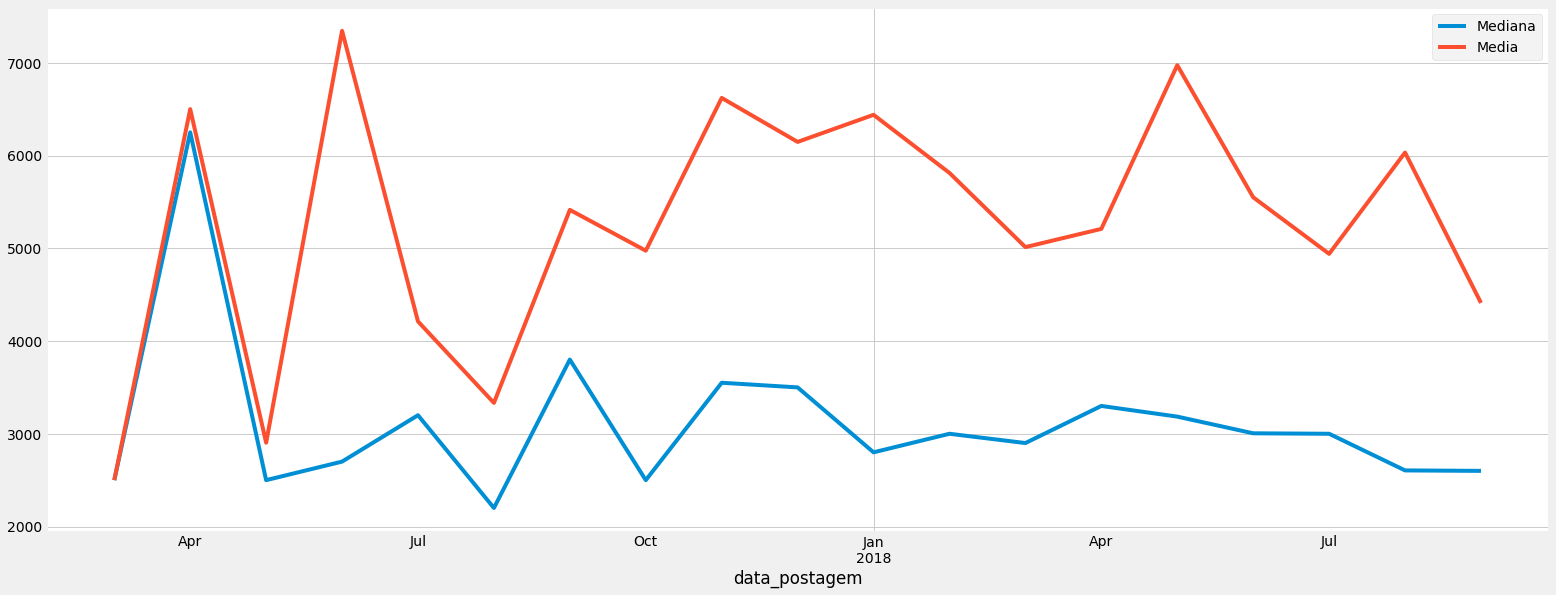

In [22]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
ax.set_facecolor("white")
median.plot(ax=ax)
mean.plot(ax=ax)
plt.show()

A partir deste gráfico não da para inferir muitas coisas, o banco de dados contém diversas faixas de alugueis, o que significa que pode existir valores de alugueis bastante altos e que podem estar inviesando os valores das medidas de tendencia central média e a mediana dos alugueis por mês, portanto definir faixa etárias para o valor do aluguel tornará os valores de média e mediana consequentemente o gráfico mais consistentes. 

### Faixa de aluguel menor que 1500

In [23]:
df_sp_l  = df_sp[ (df_sp.preco_aluguel < 1500)]

In [24]:
df_sp_l['preco_aluguel'].describe()

count    1309.000000
mean     1192.515661
std       191.049417
min       450.000000
25%      1080.000000
50%      1200.000000
75%      1350.000000
max      1495.000000
Name: preco_aluguel, dtype: float64

In [25]:
df_sp_l_filtred_median = df_sp_l.resample('M').median().dropna()
df_sp_l_filtred_mean = df_sp_l.resample('M').mean().dropna()

In [26]:
median = df_sp_l_filtred_median['2017-01':'2018-09'][['preco_aluguel']]
mean = df_sp_l_filtred_mean['2017-01':'2018-09'][['preco_aluguel']]

In [27]:
median = median.rename(columns={'preco_aluguel': 'Mediana'})
mean = mean.rename(columns={'preco_aluguel': 'Media'})

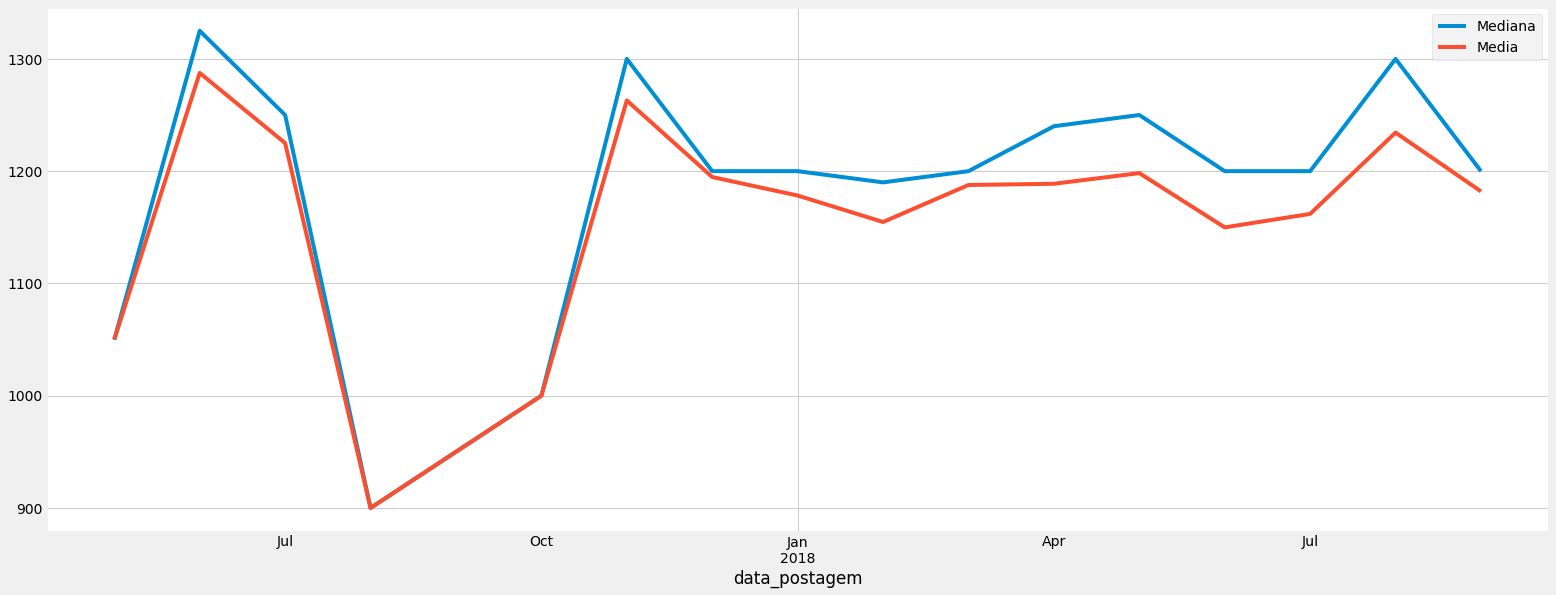

In [28]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
ax.set_facecolor("white")
median.plot(ax=ax)
mean.plot(ax=ax,)
plt.show()

### Faixa de aluguel 1500 - 2000

In [70]:
df_sp_l  = df_sp[ (df_sp.preco_aluguel >= 1500) & (df_sp.preco_aluguel < 2001)]

In [71]:
df_sp_l.corr()

preco_aluguel  qtd_banheiro  qtd_quarto  metro_quadrado
preco_aluguel        1.000000      0.035060   -0.052558        0.037799
qtd_banheiro         0.035060      1.000000    0.650534        0.738993
qtd_quarto          -0.052558      0.650534    1.000000        0.772178
metro_quadrado       0.037799      0.738993    0.772178        1.000000

In [30]:
len(df_sp_l )

2443

In [31]:
df_sp_l['preco_aluguel'].describe()

count    2443.000000
mean     1766.120344
std       170.839528
min      1500.000000
25%      1600.000000
50%      1800.000000
75%      1900.000000
max      2000.000000
Name: preco_aluguel, dtype: float64

In [32]:
df_sp_l_filtred_median = df_sp_l.resample('M').median().dropna()
df_sp_l_filtred_mean = df_sp_l.resample('M').mean().dropna()

In [33]:
median = df_sp_l_filtred_median['2017-01':'2018-09'][['preco_aluguel']]
mean = df_sp_l_filtred_mean['2017-01':'2018-09'][['preco_aluguel']]

In [34]:
median = median.rename(columns={'preco_aluguel': 'Mediana'})
mean = mean.rename(columns={'preco_aluguel': 'Media'})

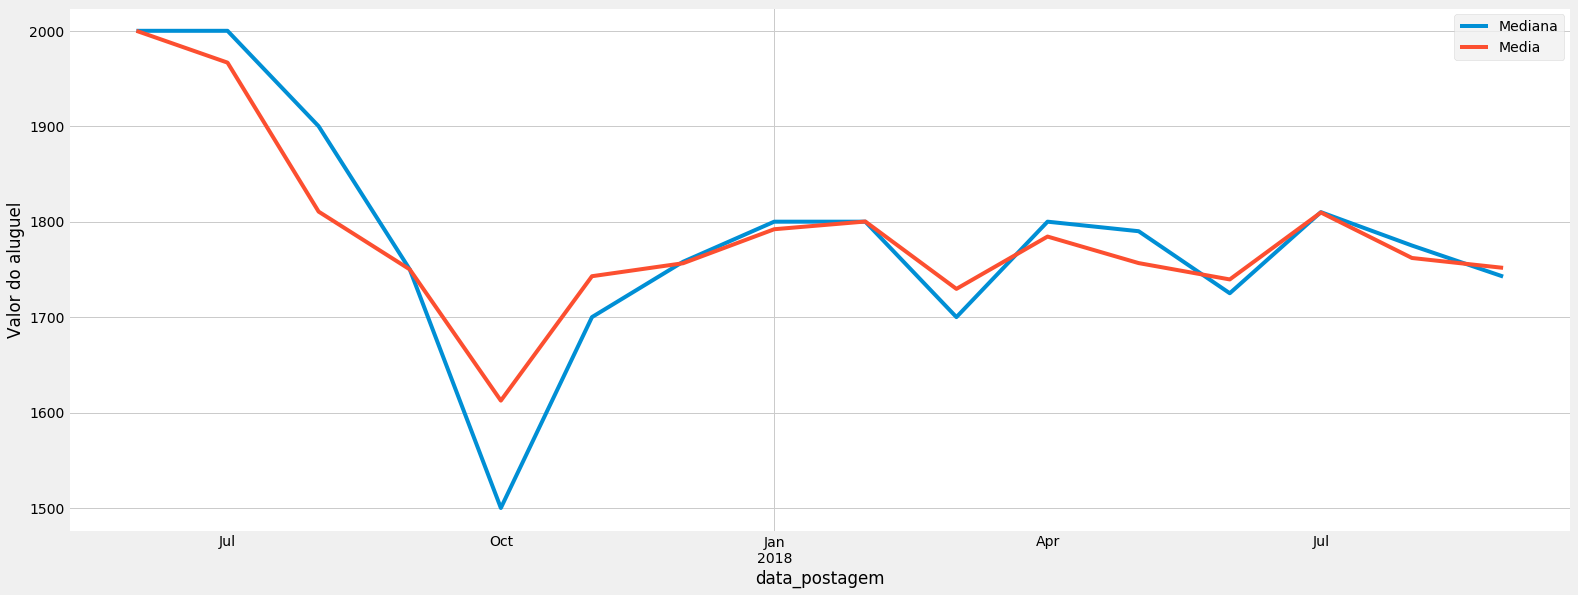

In [35]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
ax.set_facecolor("white")
plt.xlabel('Período do Ano')
plt.ylabel('Valor do aluguel')
median.plot(ax=ax)
mean.plot(ax=ax,)
plt.show()

In [49]:
df_sp_l_filtred_median = df_sp_l.resample('W').median().dropna()
df_sp_l_filtred_mean = df_sp_l.resample('W').mean().dropna()

In [50]:
median = df_sp_l_filtred_median['2017-08':'2017-12'][['preco_aluguel']]
mean = df_sp_l_filtred_mean['2017-08':'2017-12'][['preco_aluguel']]

In [51]:
median = median.rename(columns={'preco_aluguel': 'Mediana'})
mean = mean.rename(columns={'preco_aluguel': 'Media'})

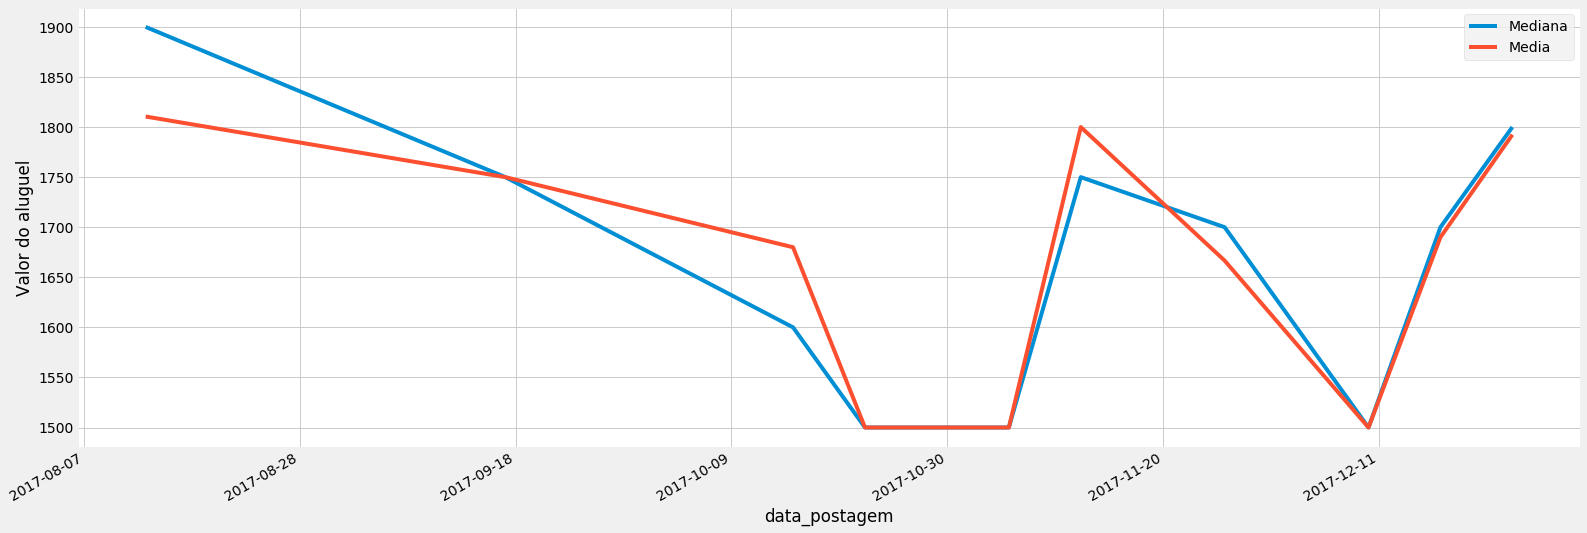

In [52]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
ax.set_facecolor("white")
plt.xlabel('Período do Ano')
plt.ylabel('Valor do aluguel')
median.plot(ax=ax)
mean.plot(ax=ax,)
plt.show()

In [48]:
mean

Media
data_postagem             
2017-08-12     1810.526316
2017-09-12     1500.000000
2017-09-16     2000.000000
2017-10-10     1600.000000
2017-10-12     1700.000000
2017-10-20     1500.000000
2017-10-31     1500.000000
2017-11-11     1750.000000
2017-11-12     1850.000000
2017-11-22     1700.000000
2017-11-25     1650.000000
2017-12-07     1500.000000
2017-12-15     1800.000000
2017-12-19     2000.000000
2017-12-20     1905.333333
2017-12-21     1650.000000
2017-12-22     1700.000000

A partir deste gráfico já é possível analisar que no período do mês de Agosto de 2017 até Novembro o valor do aluguel sofre uma quedra brusca, porém ao final do ano, período onde é inciado as férias e festejos, como Natal e Ano Novo o valor aumenta, chegando no meio do ano os valor do aluguel sofre uma pequena queda no seu valor, porém no mês de agosto, mês de férias estudantil esse valor sofre um aumento

### 1 Quarto e 1 Banheiro

In [78]:
df_sp_l  = df_sp[ (df_sp.metro_quadrado >= 30) & (df_sp.metro_quadrado <= 60)]

In [79]:
df_sp_l[['preco_aluguel']].describe()

preco_aluguel
count    3525.000000
mean     2432.115177
std      1264.146214
min       450.000000
25%      1700.000000
50%      2170.000000
75%      2837.000000
max     20000.000000

In [80]:
len(df_sp_l )

3525

In [81]:
df_sp_l_filtred_median = df_sp_l.resample('M').median().dropna()
df_sp_l_filtred_mean = df_sp_l.resample('M').mean().dropna()

In [82]:
median = df_sp_l_filtred_median['2017-01':'2018-09'][['preco_aluguel']]
mean = df_sp_l_filtred_mean['2017-01':'2018-09'][['preco_aluguel']]

median = median.rename(columns={'preco_aluguel': 'Mediana'})
mean = mean.rename(columns={'preco_aluguel': 'Media'})

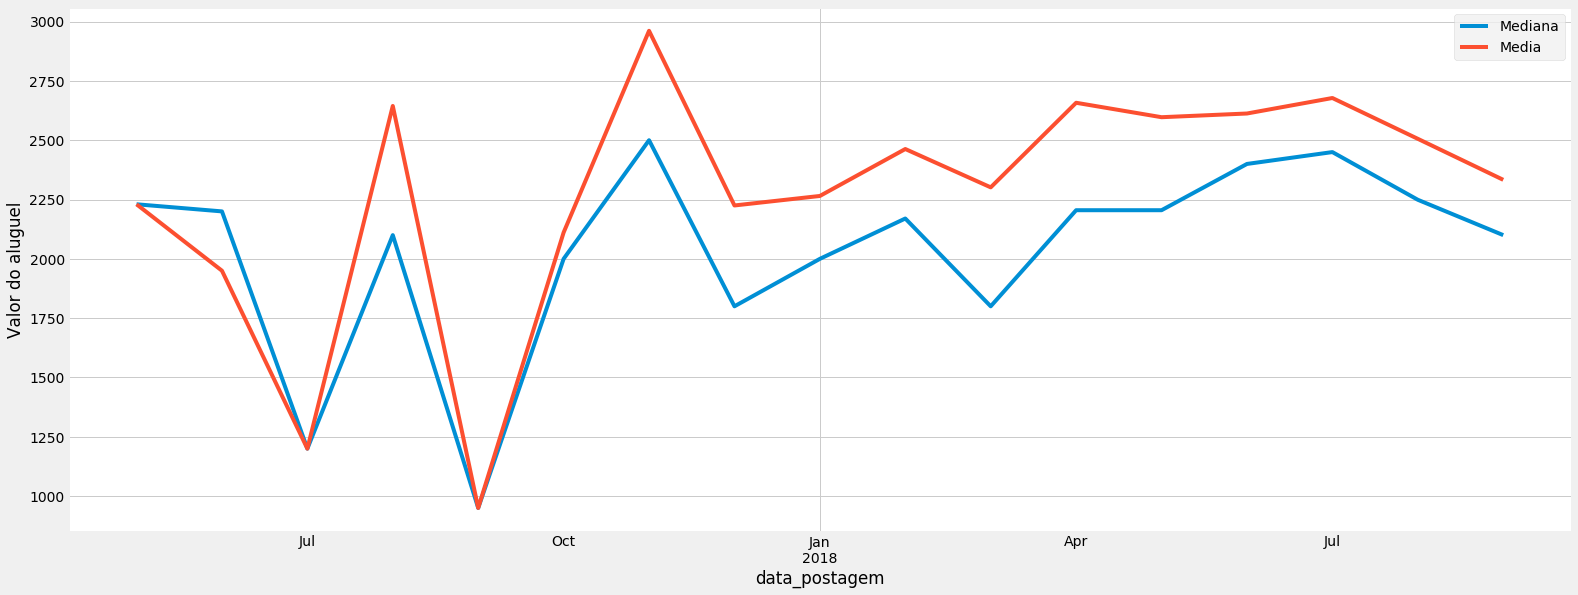

In [83]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
ax.set_facecolor("white")
plt.xlabel('Período do Ano')
plt.ylabel('Valor do aluguel')
median.plot(ax=ax)
mean.plot(ax=ax,)
plt.show()

# Porcentagem de unidades

In [113]:
df_sp_l = df_sp[ (df_sp.preco_aluguel <= 2001)]
total = len(df_sp_l)
df_sp_l_ = df_sp_l.resample('M').count()
df_sp_l_['por_2000'] = df_sp_l.resample('M').count()['cidade']['2017-01':'2018-09'].apply(lambda x:float(x)/total * 100)
####
# df_sp_l = df_sp[ (df_sp.preco_aluguel <= 4001)]
# total = len(df_sp_l)
# df_sp_l_2 = df_sp_l.resample('M').count()
# df_sp_l_2['por_4000'] = df_sp_l.resample('M').count()['cidade'].apply(lambda x:float(x)/total * 100)

In [63]:
df_sp_sul  = df_sp[ (df_sp.zona == 'Sul')]
df_sp_norte  = df_sp[ (df_sp.zona == 'Norte')]
df_sp_leste  = df_sp[ (df_sp.zona == 'Leste')]
df_sp_oeste  = df_sp[ (df_sp.zona == 'Oeste')]
df_sp_centro  = df_sp[ (df_sp.zona == 'Centro')]

In [64]:
df_sp_l_filtred_sul = df_sp_sul.resample('M').median().dropna()
df_sp_l_filtred_norte = df_sp_norte.resample('M').median().dropna()
df_sp_l_filtred_leste = df_sp_leste.resample('M').median().dropna()
df_sp_l_filtred_oeste = df_sp_oeste.resample('M').median().dropna()
df_sp_l_filtred_centro = df_sp_centro.resample('M').median().dropna()

In [65]:
sul = df_sp_l_filtred_sul['2018-01':'2018-09'][['preco_aluguel']]
norte = df_sp_l_filtred_norte['2018-01':'2018-09'][['preco_aluguel']]
leste = df_sp_l_filtred_leste['2018-01':'2018-09'][['preco_aluguel']]
oeste = df_sp_l_filtred_oeste['2018-01':'2018-09'][['preco_aluguel']]
centro = df_sp_l_filtred_centro['2018-01':'2018-09'][['preco_aluguel']]


sul    = sul.rename(columns={'preco_aluguel': 'Zona Sul'})
norte  = norte.rename(columns={'preco_aluguel': 'Zona Norte'})
leste  = leste.rename(columns={'preco_aluguel': 'Zona Leste'})
oeste  = oeste.rename(columns={'preco_aluguel': 'Zona Oeste'})
centro = centro.rename(columns={'preco_aluguel': 'Zona Centro'})


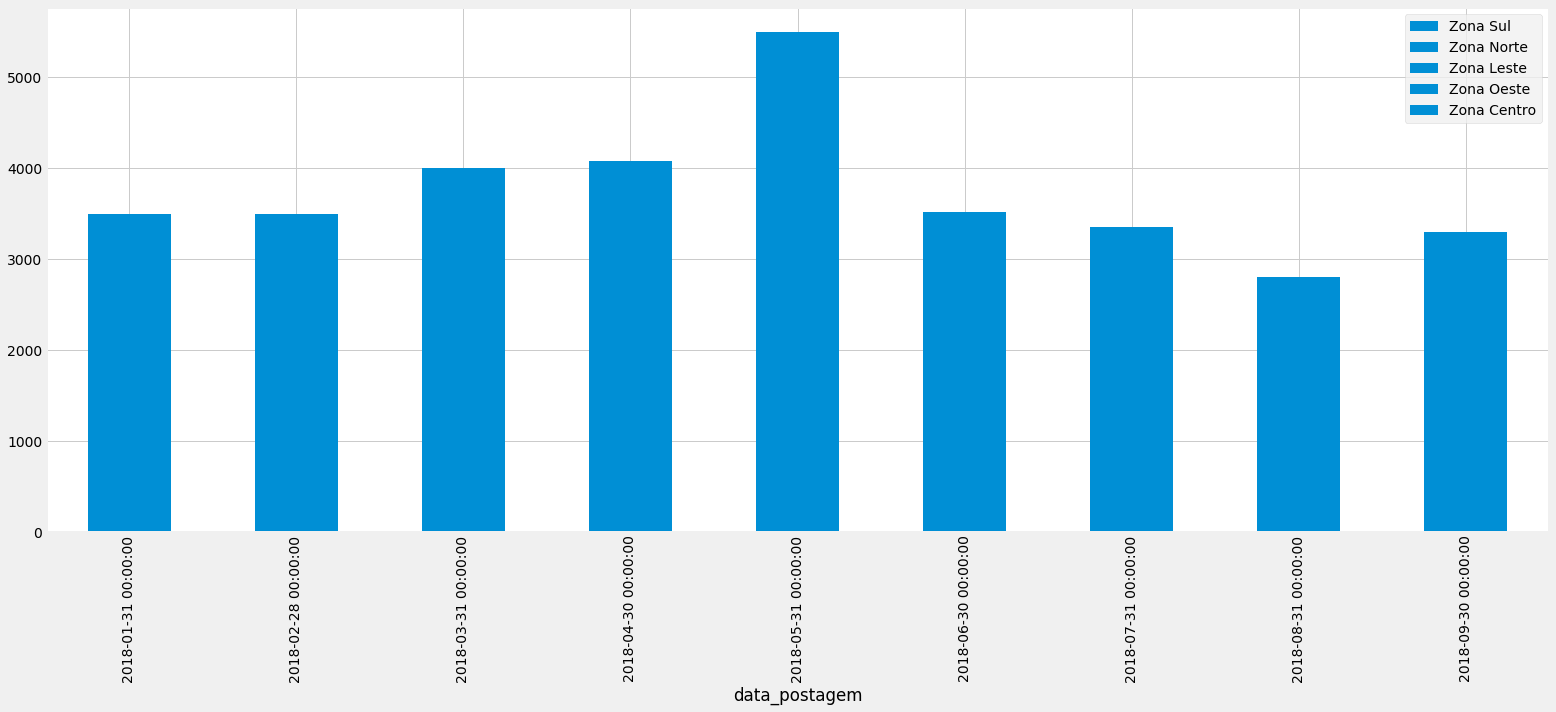

In [69]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
ax.set_facecolor("white")
sul.plot(ax=ax,kind='bar')   
norte.plot(ax=ax,kind='bar') 
leste.plot(ax=ax,kind='bar') 
oeste.plot(ax=ax,kind='bar') 
centro.plot(ax=ax,kind='bar',stacked=True)
plt.show()

In [68]:
oeste

Zona Oeste
data_postagem            
2018-01-31         3500.0
2018-02-28         3500.0
2018-03-31         3685.0
2018-04-30         4080.0
2018-05-31         5500.0
2018-06-30         3515.0
2018-07-31         3025.0
2018-08-31         2685.0
2018-09-30         3300.0

In [61]:
centro[['zona_centro_media']]

KeyError: "['zona_centro_media'] not in index"

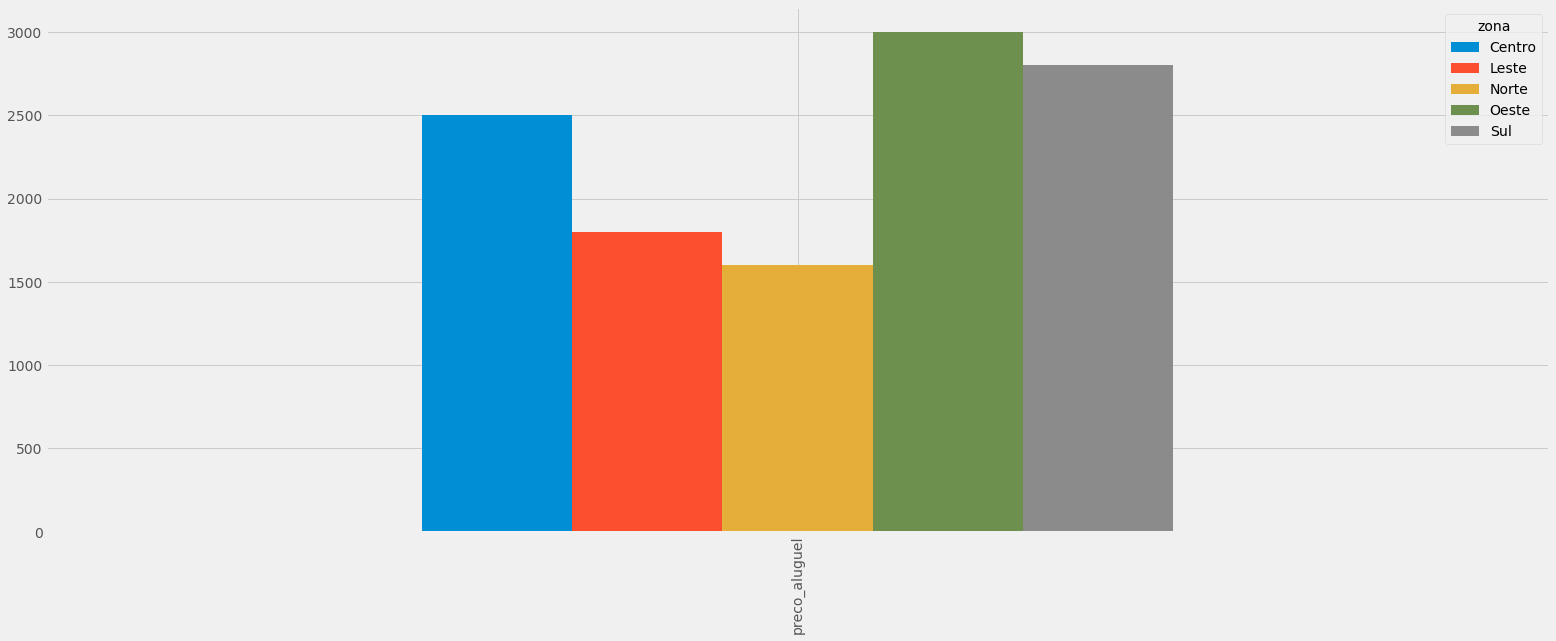

zona           Centro   Leste   Norte   Oeste     Sul
preco_aluguel  2500.0  1800.0  1600.0  3000.0  2800.0

In [56]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
df_sp.groupby('zona').median()[['preco_aluguel']].transpose().plot(kind='bar',ax=ax)
# df_sp.groupby('zona').median()[['preco_aluguel']].transpose().plot(kind='bar',ax=ax,colors=['black'])
plt.show()
df_sp.groupby('zona').median()[['preco_aluguel']].transpose()

In [57]:
df_sp_by_msquare = df_sp.groupby('bairro',as_index=False)[['preco_aluguel','metro_quadrado']].mean()

In [58]:
def calculate_msquare(row):
    return row['preco_aluguel'] / row['metro_quadrado']
df_sp_by_msquare['metro_quadrado_price'] = df_sp_by_msquare.apply(calculate_msquare, axis=1)

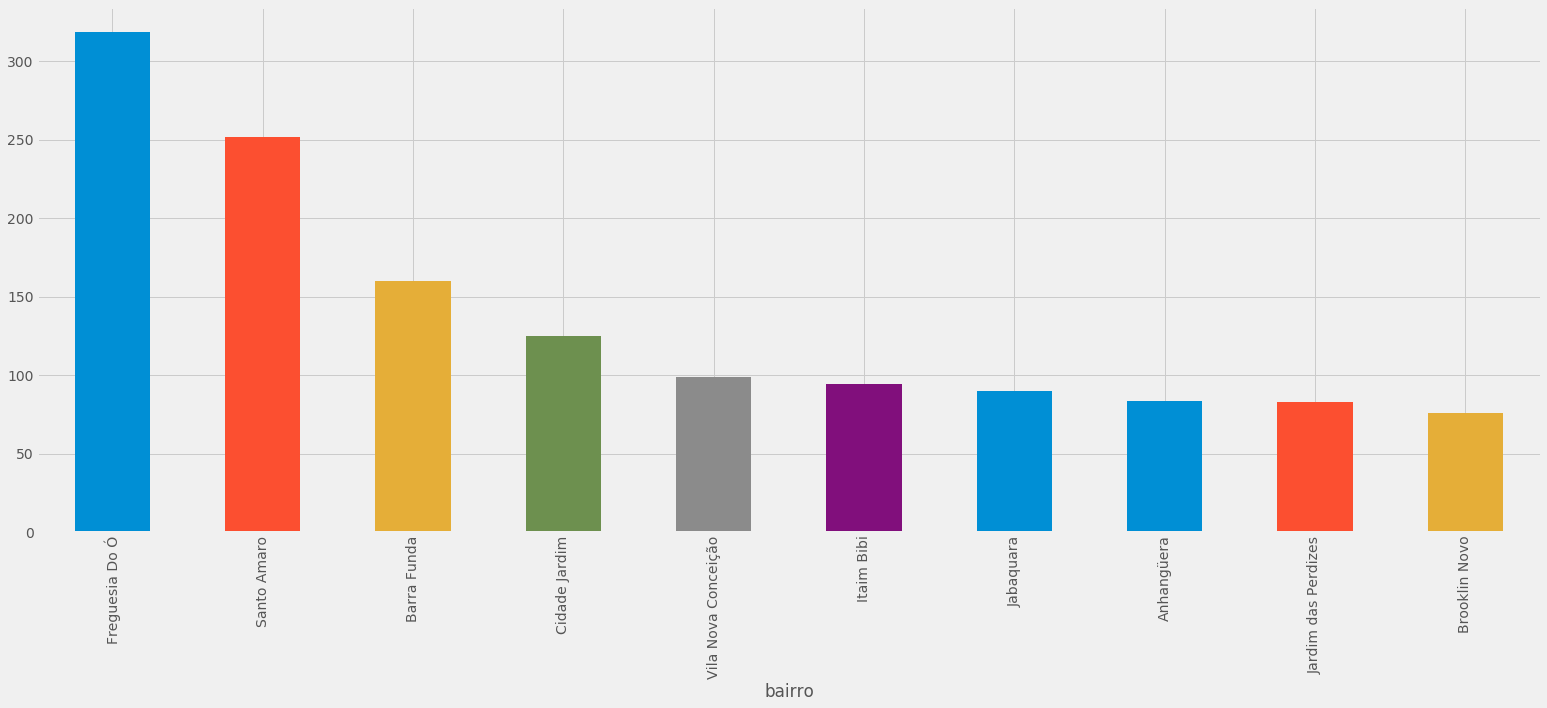

In [59]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
df_sp_by_msquare_ = df_sp_by_msquare[['bairro','metro_quadrado_price']].sort_values('metro_quadrado_price',ascending=False)[:10]
df_sp_by_msquare_.index = df_sp_by_msquare_.bairro
df_sp_by_msquare_['metro_quadrado_price'].transpose().plot(kind='bar',ax=ax)
plt.show()

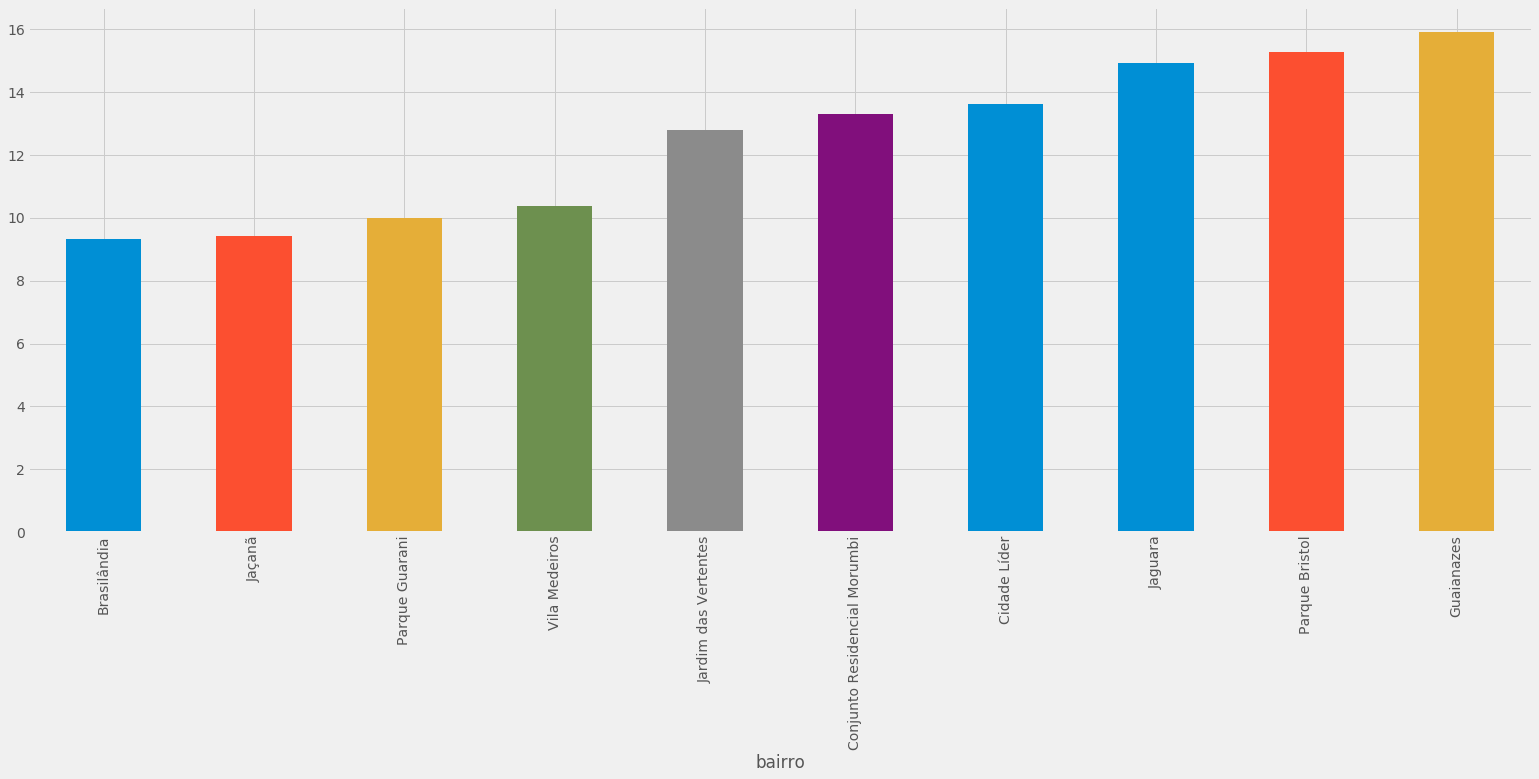

In [60]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(24,9))
df_sp_by_msquare_ = df_sp_by_msquare[['bairro','metro_quadrado_price']].sort_values('metro_quadrado_price',ascending=True)[:10]
df_sp_by_msquare_.index = df_sp_by_msquare_.bairro
df_sp_by_msquare_['metro_quadrado_price'].transpose().plot(kind='bar',ax=ax)
plt.show()